In [147]:
# Imports and boilerplate to make graphs look better
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import wave
from IPython.display import Audio

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Random Forest and XGBoost

I want to understand roughly how random forest decision trees perform, and compare that with xgboost. I'll use `y=x^2` as a sample problem to learn against.

## Training/testing set

First, let's define our training and data sets...

In [148]:
# Training x and training y
x_train = np.random.uniform(-5, 5, 1000)
y_train = x_train**2 + np.random.normal(0, 1, 1000)

# To draw the true `y=x^2`...
x_true = np.linspace(-5, 5, 1000)
y_true = x_true**2

# Test data - note that we go outside the bounds of the testing data
x_test = np.linspace(-10, 10, 100)

### Visualize testing data

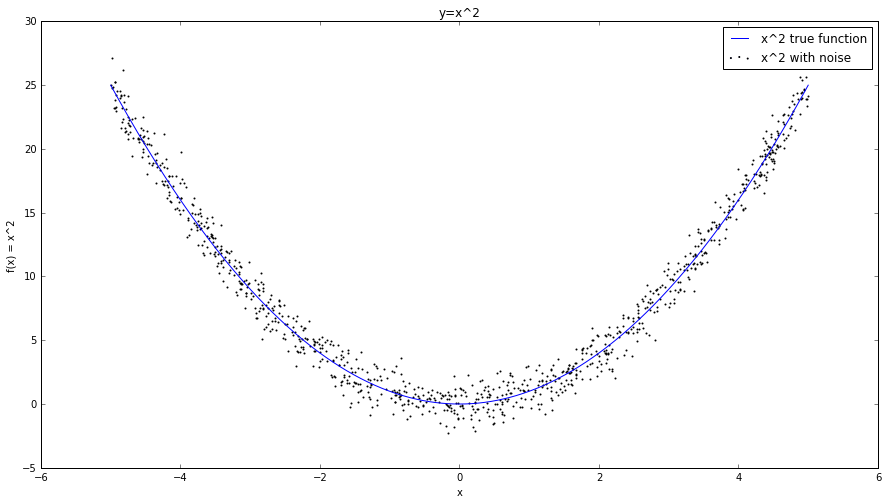

In [149]:
setup_graph(title='y=x^2', x_label='x', y_label='f(x) = x^2', fig_size=(15,8))
plt.scatter(x_train, y_train, s=1, label="x^2 with noise")
plt.plot(x_true, y_true, c="b", label="x^2 true function")
plt.legend(loc="best")
plt.show()

## Scikit-learn RandomForestRegressor

### Train

In [150]:
from sklearn.ensemble import RandomForestRegressor
clf_x2 = RandomForestRegressor()
clf_x2.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

### Predict

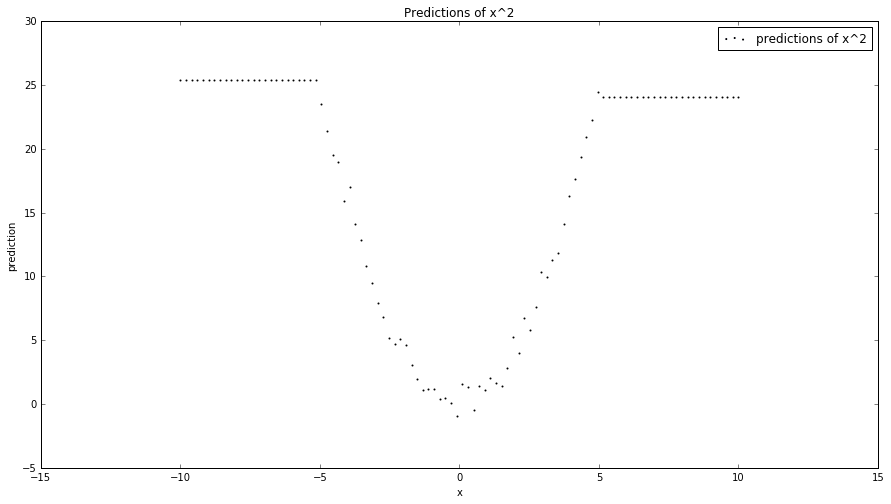

In [151]:
predictions_skl = clf_x2.predict(x_test.reshape(-1,1))

setup_graph(title='Predictions of x^2', x_label='x', y_label='prediction', fig_size=(15,8))
plt.scatter(x_test, predictions_skl, s=1, label="predictions of x^2")
plt.legend(loc="best")
plt.show()

**Note the overfitting here.**

## XGBoost

Now let's try it with xgboost.

In [152]:
import xgboost as xgb

### Train

In [153]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'reg:linear', 'num_feature': 1}
num_round = 2

train_dmatrix = xgb.DMatrix(data=x_train.reshape(-1,1), label=y_train.reshape(-1,1))
bst = xgb.train(param, train_dmatrix, num_round)

### Predict

In [154]:
bst.predict(xgb.DMatrix([[-10], [-5], [1], [5], [10]]))

array([ 21.94774437,  21.94774437,   2.5279274 ,  21.10725403,  21.10725403], dtype=float32)

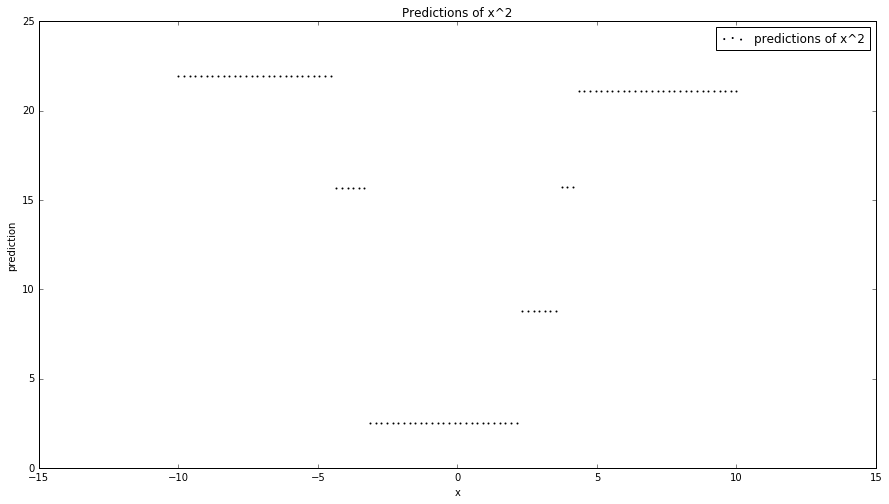

In [155]:
x_predict = np.linspace(-10, 10, 100)
xgb_predictions_x2 = bst.predict(xgb.DMatrix(x_predict.reshape(-1, 1)))

setup_graph(title='Predictions of x^2', x_label='x', y_label='prediction', fig_size=(15,8))
plt.scatter(x_predict, xgb_predictions_x2, s=1, label="predictions of x^2")
plt.legend(loc="best")
plt.show()

Wow, funny shape. Clearly, we need more split points :)

## XGBoost try - more depth

In [156]:
param = {'max_depth': 10, 'eta': 1, 'silent': 1, 'objective': 'reg:linear', 'num_feature': 1}
num_round = 2
train_dmatrix = xgb.DMatrix(data=x_train.reshape(-1,1), label=y_train.reshape(-1,1))
bst = xgb.train(param, train_dmatrix, num_round)

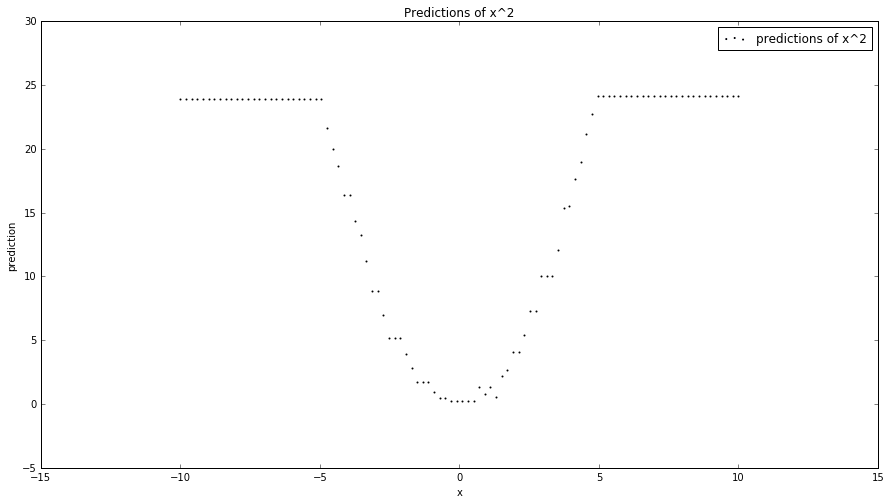

In [157]:
x_predict = np.linspace(-10, 10, 100)
xgb_predictions_x2 = bst.predict(xgb.DMatrix(x_predict.reshape(-1, 1)))

setup_graph(title='Predictions of x^2', x_label='x', y_label='prediction', fig_size=(15,8))
plt.scatter(x_predict, xgb_predictions_x2, s=1, label="predictions of x^2")
plt.legend(loc="best")
plt.show()

## xgboost - more rounds of boosting

In [158]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'reg:linear', 'num_feature': 1}
num_round = 10
train_dmatrix = xgb.DMatrix(data=x_train.reshape(-1,1), label=y_train.reshape(-1,1))
bst = xgb.train(param, train_dmatrix, num_round)

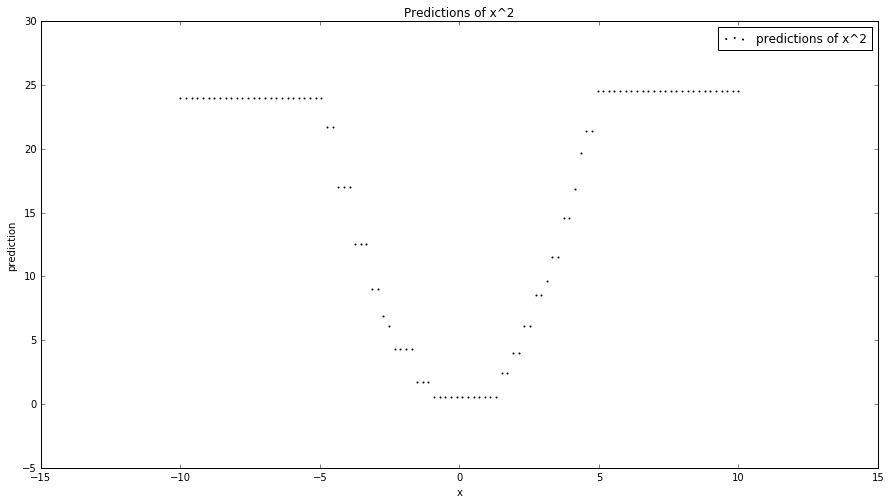

In [159]:
x_predict = np.linspace(-10, 10, 100)
xgb_predictions_x2 = bst.predict(xgb.DMatrix(x_predict.reshape(-1, 1)))

setup_graph(title='Predictions of x^2', x_label='x', y_label='prediction', fig_size=(15,8))
plt.scatter(x_predict, xgb_predictions_x2, s=1, label="predictions of x^2")
plt.legend(loc="best")
plt.show()

### What happens if I have like one data point further out and have a large blank space in between?

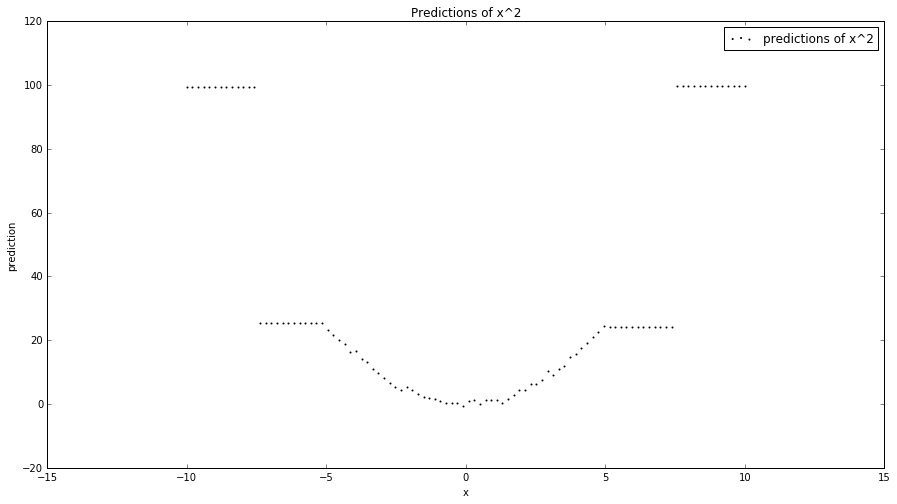

In [160]:
param = {'max_depth': 10, 'eta': 1, 'silent': 1, 'objective': 'reg:linear', 'num_feature': 1}
num_round = 10

x_larger = np.append(x_train, np.array([-10, 10]))
y_larger = np.append(y_train, np.array([10**2, 10**2]))

train_dmatrix = xgb.DMatrix(data=x_larger.reshape(-1,1), label=y_larger.reshape(-1,1))
bst = xgb.train(param, train_dmatrix, num_round)

x_predict = np.linspace(-10, 10, 100)
xgb_predictions_x2 = bst.predict(xgb.DMatrix(x_predict.reshape(-1, 1)))

setup_graph(title='Predictions of x^2', x_label='x', y_label='prediction', fig_size=(15,8))
plt.scatter(x_predict, xgb_predictions_x2, s=1, label="predictions of x^2")
plt.legend(loc="best")
plt.show()

**Pretty bad overfitting still. Though to be fair, I only added one data point further out. My guess is that gradient-boosting helps more when there are more features to tweak (i.e. it's probably least effective in this single-feature example).**